In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# 데이터 : 물고기의 주요 특징
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# 시각화를 위한 색상 리스트(약자도 가능)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

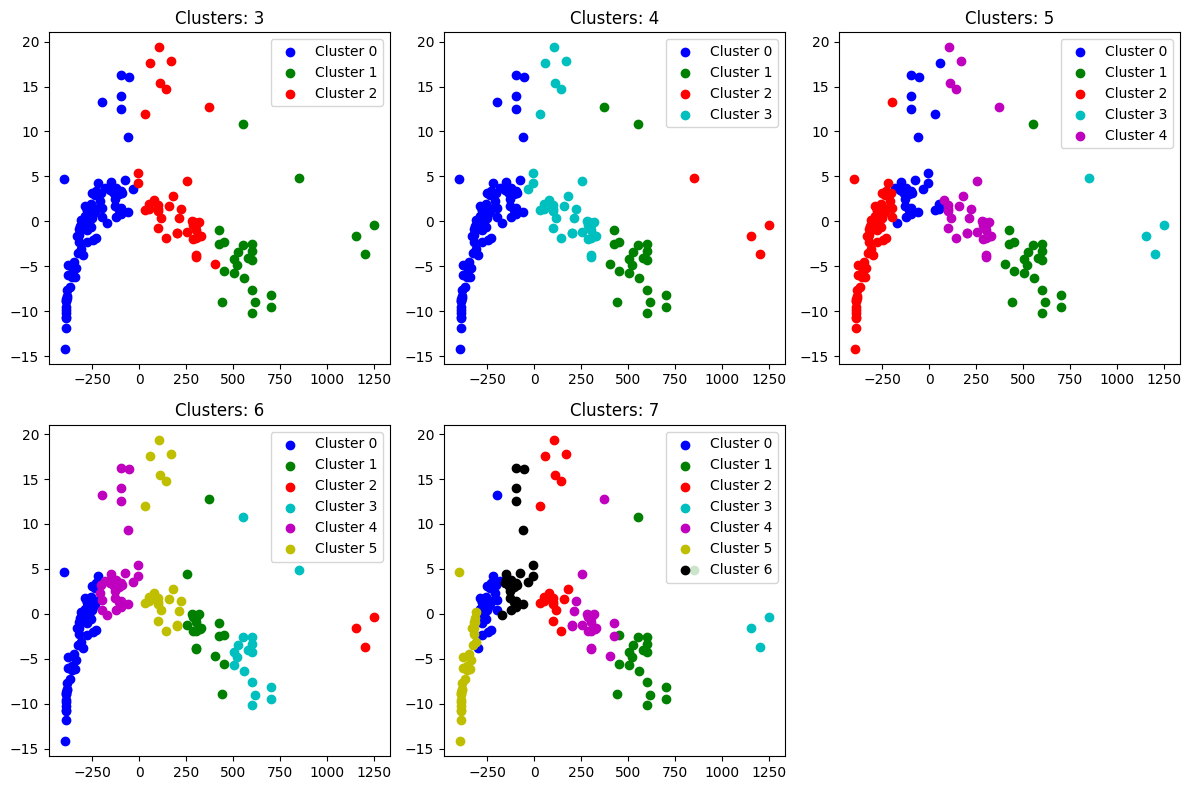

In [4]:
# 군집 수를 설정 : 3~7개
cluster_nums = [3, 4, 5, 6, 7]

plt.figure(figsize=(12, 8))

for i, num_clusters in enumerate(cluster_nums):
    # K-Means 모델 생성 및 학습
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(fish_input)

    # 클러스터 라벨
    cluster_labels = kmeans.labels_

    # 2차원 시각화를 위해 PCA를 사용하여 데이터를 축소

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(fish_input)

    # 각 클러스터를 시각화합니다.
    plt.subplot(2, 3, i + 1)
    for cluster_num in range(num_clusters):
        cluster_points = reduced_data[cluster_labels == cluster_num]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster_num], label=f'Cluster {cluster_num}')

    plt.title(f'Clusters: {num_clusters}')
    plt.legend()

plt.tight_layout()
plt.show()